# Set Up

In [527]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import math

In [545]:
case = "2D"
numberOfCases = 2
days = 20
data_path = "../Data/"

### with sponge layer
#image_save_folder = "sponge/"
spl = ""
image_save_folder = "flux/"

## without sponge layer
# image_save_folder = "no-sponge/"
# spl = "-nosl"

cases = [f"sim{case}{i}{spl}" for i in range(1, numberOfCases + 1)]
casenames = [f"sim{case}{i}-{days}{spl}" for i in range(1, numberOfCases + 1)]

print(f"loading cases {casenames}")

ncs = []

for casename in casenames:
    nc_file = f"{data_path}{casename}_averages.nc"
    ds_avg = xr.open_dataset(nc_file).load()
    ncs.append(ds_avg)
    ds_avg.close()


loading cases ['sim2D1-20', 'sim2D2-20']


In [532]:
nc_file = f"../Data/sim2D2-20-pw1_averages.nc"
ds_avg1 = xr.open_dataset(nc_file).load()
ncs.append(ds_avg1)
ds_avg1.close()

Forgot to save these in the `.nc` files to let's just load them in here for now

In [453]:
sim2D1 = {
    'M²': 0,
    'B₀': -4.24e-8,
    'αᵣ': 0.08,
    'αₛ': 0.22,
    'β': 0,
}

sim2D2 = {
    'M²': -4.24e-7,
    'B₀': -4.24e-8,
    'αᵣ': 0.00,
    'αₛ': 0.21,
    'β': -0.09,
}

sim2D3 = {
    'M²': -2.12e-7,
    'B₀': -4.24e-8,
    'αᵣ': 0.02,
    'αₛ': 0.21,
    'β': -0.04,
}

sim2D4 = {
    'M²': -8.24e-7,
    'B₀': -4.24e-8,
    'αᵣ': 0.00,
    'αₛ': 0.21,
    'β': -0.20,
}

sim2D5 = {
    'M²': -4.24e-7,
    'B₀': -8.48e-8,
    'αᵣ': 0.01,
    'αₛ': 0.11,
    'β': -0.03,
}

sim2D6 = {
    'M²': -4.24e-7,
    'B₀': -2.12e-8,
    'αᵣ': 0.00,
    'αₛ': 0.42,
    'β': -0.12,
}
# List of all simulations
simulations = [sim2D1, sim2D2, sim2D3, sim2D4, sim2D5, sim2D6]

# Calculate α and β for each simulation
alpha_beta_list = [(sim['αᵣ'] + sim['αₛ'], sim['β']) for sim in simulations]

# Output the list
print(alpha_beta_list)

[(0.3, 0), (0.21, -0.09), (0.22999999999999998, -0.04), (0.21, -0.2), (0.12, -0.03), (0.42, -0.12)]


In [516]:
cases.append("sim2D2-flux")

In [454]:
#TODO: Load in variables from .nc files and remove the above
# Load variables
N02 = 9e-5
f = 1e-4
inertial_period = (2*math.pi)/f #s

# Buoyancy Profile

In [546]:
index = 1                 # 0 -> 2D1, 1 -> 2D2, ...
data_set = cases[index]
ds_avg = ncs[index]

print(f"Using data set: {data_set}")

Using data set: sim2D2


## Initial

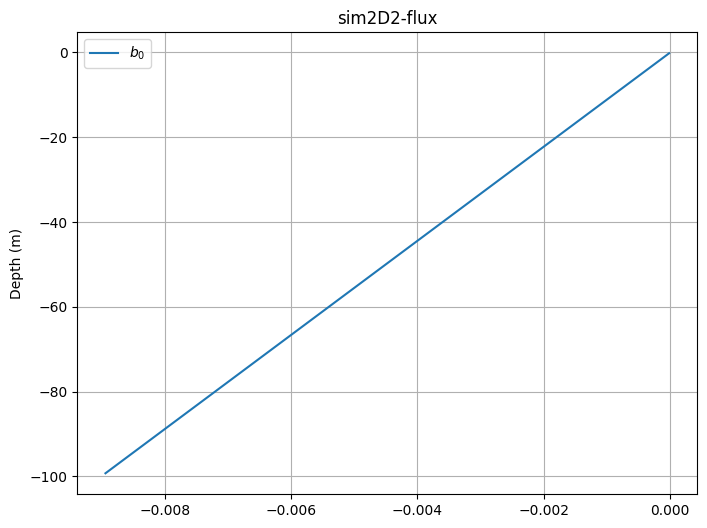

In [518]:
plt.figure(figsize=(8, 6))
plt.plot(ds_avg.b.isel(time=0), ds_avg.zC, label=f"$b_0$")
plt.ylabel('Depth (m)')
plt.legend()
plt.title(data_set)
plt.grid()
plt.show()

## Evolution

In [533]:
ds_avg = ds_avg1

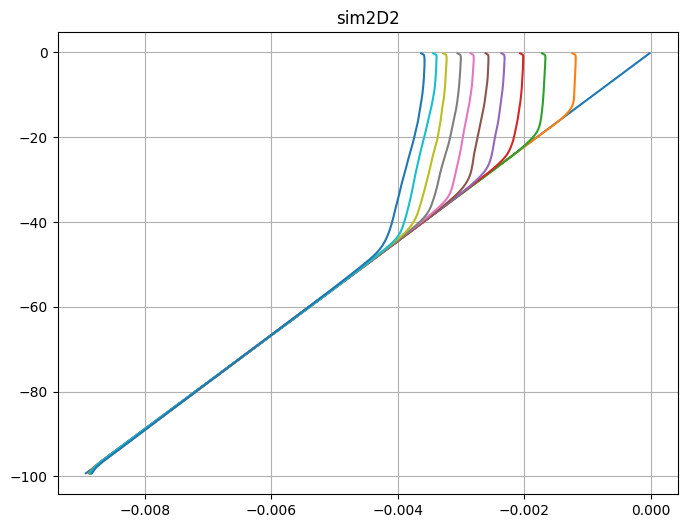

In [547]:
final_time = len(ds_avg.b)-1
middle_time = int(round((final_time) / 2))

plt.figure(figsize=(8, 6))
for i in range(0, final_time, round(final_time/11)):
    plt.plot(ds_avg.b.isel(time=i).values, ds_avg.zC)


# plt.plot(ds_avg.b.isel(time=0).values, ds_avg.zC, label=f"$b_0$")
# plt.plot(ds_avg.b.isel(time=middle_time).values, ds_avg.zC, label=f"$b_{{{middle_time}}}$")
# plt.plot(ds_avg.b.isel(time=final_time).values, ds_avg.zC, label=f"$b_{{{final_time}}}$")
# plt.ylabel('Depth (m)')
# plt.legend()
plt.title(data_set)
plt.grid()
plt.show()

## Evolution Movie

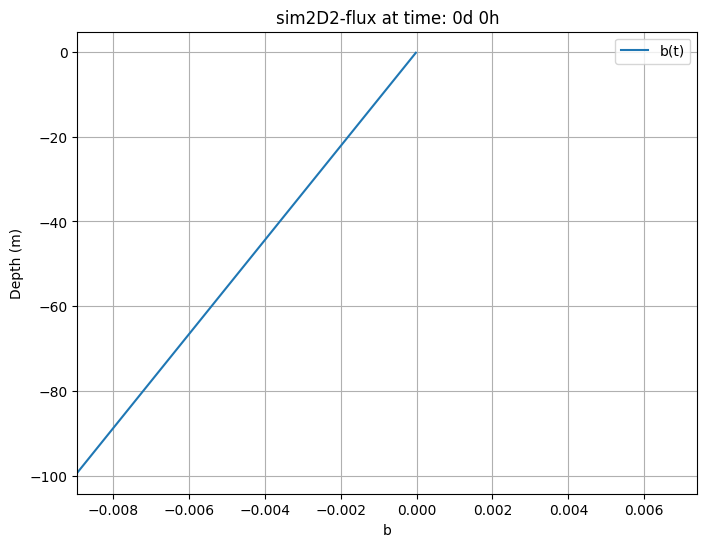

In [535]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

min_value = ds_avg.b.min()
max_value = ds_avg.b.max()

# Define a function to update the plot for each frame
def update(frame):
    ax.cla()  # Clear the current axis
    ax.plot(ds_avg.b.isel(time=frame), ds_avg.zC, label="b(t)")
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('b')
    ax.legend()
    ax.grid()
    
    # Convert time to days, hours, and minutes
    time_in_seconds = pd.to_timedelta(ds_avg.time[frame].values, unit='s')
    days = time_in_seconds.days
    hours, remainder = divmod(time_in_seconds.seconds, 3600)

    ax.set_title(f'{data_set} at time: {days}d {hours}h')
    
    ax.set_xlim(min_value, max_value)

# Create the animation object
ani = animation.FuncAnimation(fig, update, frames=len(ds_avg.time), interval=10000, repeat=False)

# Save the animation as a GIF
ani.save(f'images/buoyancy-evaluation-{data_set}.gif', writer='pillow')

# Figure 2

Evolution of the buoyancy frequency normalized by the initial value for a simulation of upright convection (simulation 2D1) and convection at a density front (simulation 2D2).

In [525]:
index = 0                  # 0 -> 2D1, 1 -> 2D2, ...
data_set1 = cases[index]
ds_avg1 = ncs[index]

print(f"Using data set: {data_set1}")

index = 1                  # 0 -> 2D1, 1 -> 2D2, ...
data_set2 = cases[index]
ds_avg2 = ncs[index]

print(f"Using data set: {data_set2}")

Using data set: sim2D2-flux


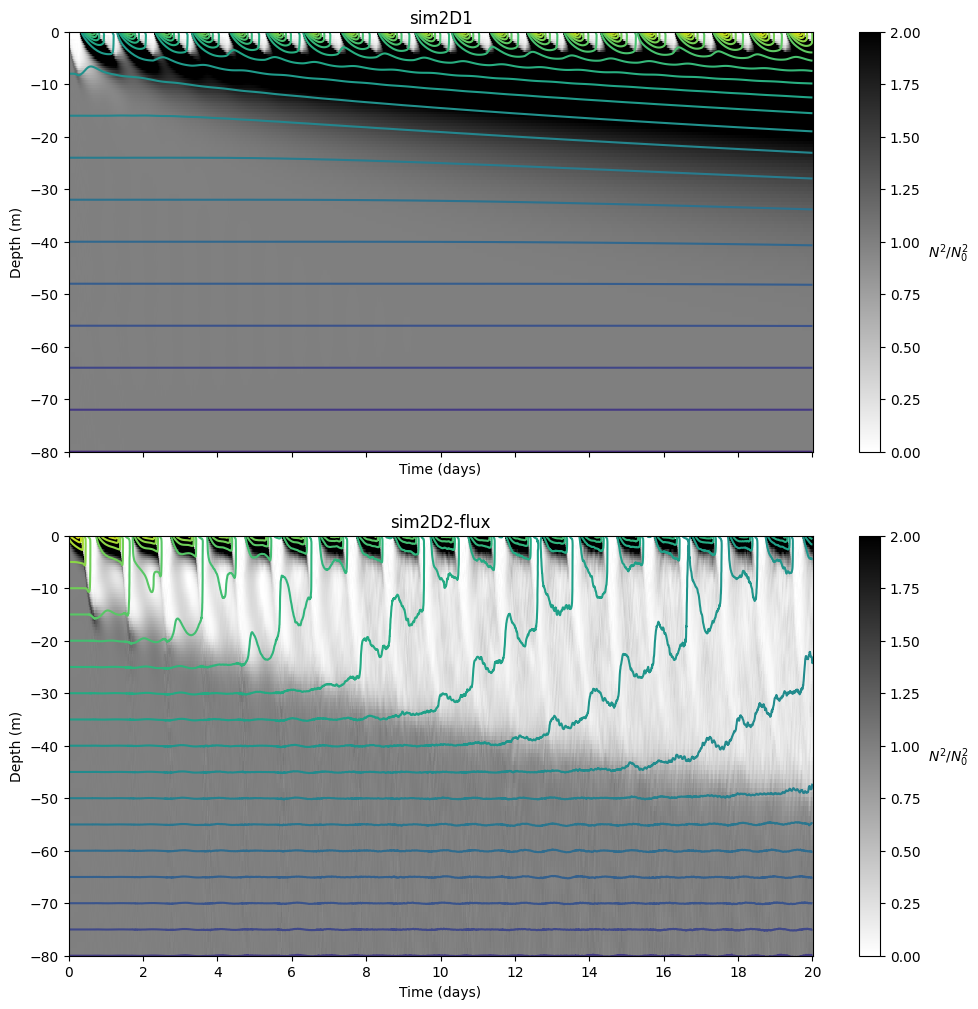

In [529]:
figure_name = "Figure 2"
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12), sharex=True)

# Plot for ds_avg1
ax1 = axes[0]

N2_1 = ds_avg1['N2']
time_1 = N2_1.coords['time'].values / np.timedelta64(1, 'D')  # Convert time to days
depth_1 = N2_1.coords['zF'].values
N2_values_1 = N2_1.values / N02

contourf_1 = ax1.pcolormesh(time_1, depth_1, N2_values_1.T, cmap='gray_r', vmin=0, vmax=2)
cbar_1 = plt.colorbar(contourf_1, ax=ax1)
cbar_1.set_label(r'$N^2 / N_0^2$', rotation=0, labelpad=20)

contour_1 = ax1.contour(time_1, ds_avg1.b.zC, ds_avg1.b[:, :].T / N02, levels=25, cmap='viridis')

ax1.set_title(f'{data_set1}')
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Depth (m)')
ax1.set_ylim(-80, 0)

# Set x-axis ticks to increments of 2 days
time_min = np.floor(time_1.min())
time_max = np.ceil(time_1.max())
ax1.set_xticks(np.arange(time_min, time_max + 2, 2))

# Plot for ds_avg2
ax2 = axes[1]
N2_2 = ds_avg2['N2']
time_2 = N2_2.coords['time'].values / np.timedelta64(1, 'D')  # Convert time to days
depth_2 = N2_2.coords['zF'].values
N2_values_2 = N2_2.values / N02

contourf_2 = ax2.pcolormesh(time_2, depth_2, N2_values_2.T, vmin=0, vmax=2, cmap='gray_r')
cbar_2 = plt.colorbar(contourf_2, ax=ax2)
cbar_2.set_label(r'$N^2 / N_0^2$', rotation=0, labelpad=20)

contour_2 = ax2.contour(ds_avg2.b.time / np.timedelta64(1, 'D'), ds_avg2.b.zC, ds_avg2.b[:, :].T / N02, levels=25, cmap='viridis')

ax2.set_title(f'{data_set2}')
ax2.set_xlabel('Time (days)')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(-80, 0)

# Set x-axis ticks to increments of 2 days
time_min = np.floor(time_2.min())
time_max = np.ceil(time_2.max())
ax2.set_xticks(np.arange(time_min, time_max + 2, 2))

# Save the figure
plt.savefig(f"images/{image_save_folder}{figure_name}.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

#  Buoyancy frequency and bulk Richardson 

## Figure 3

(a) Buoyancy frequency and (b) bulk Richardson number averaged in $x$ and for $1$ inertial period centered at $t = 15$ days.

In [485]:
# num_simulations = 6
num_simulations = [0,1,2,3,4,5]
figure_name = "Figure 3"

sim2D1-nosl
sim2D2-nosl
sim2D3-nosl
sim2D4-nosl
sim2D5-nosl
sim2D6-nosl


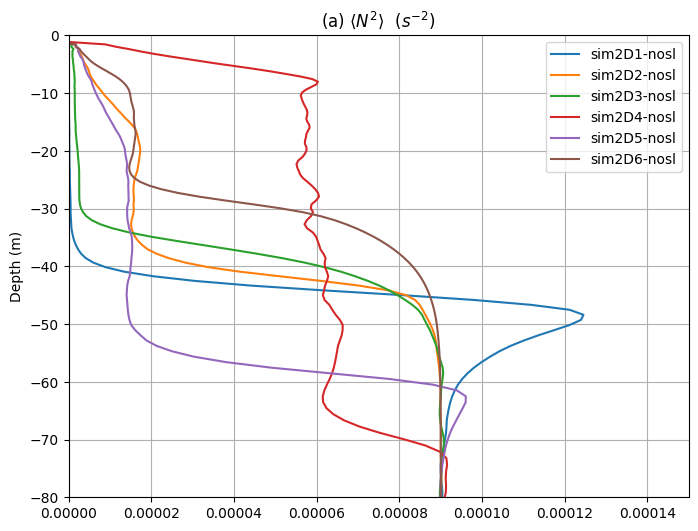

In [487]:
# Compute the mean of one inertial period centered at day 15
inertial_period_days = inertial_period / (24 * 3600)

center_day = 15
start_day = center_day - inertial_period_days / 2
end_day = center_day + inertial_period_days / 2


# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))

for i in num_simulations:
    print(cases[i])
    ds_avg = ncs[i]
    time_in_days = ds_avg['time'].values / np.timedelta64(1, 'D')
    time_mask = (time_in_days >= start_day) & (time_in_days <= end_day)
    ds_selected = ds_avg.N2.isel(time=time_mask)
    ds_mean = ds_selected.mean(dim='time')
    ax.plot(ds_mean, ds_avg.zF, label=f"{cases[i]}")


ax.set_ylabel('Depth (m)')
ax.legend()
ax.set_title(f"(a) $\\left\\langle N^2 \\right\\rangle ~~ (s^{{-2}})$")
ax.grid()
ax.set_ylim(-80, 0)
ax.set_xlim(0,15e-5)

plt.savefig(f"images/{image_save_folder}{figure_name}.png", dpi=300, bbox_inches='tight')
plt.show()

## Buoyancy Frequency Evolution Movie

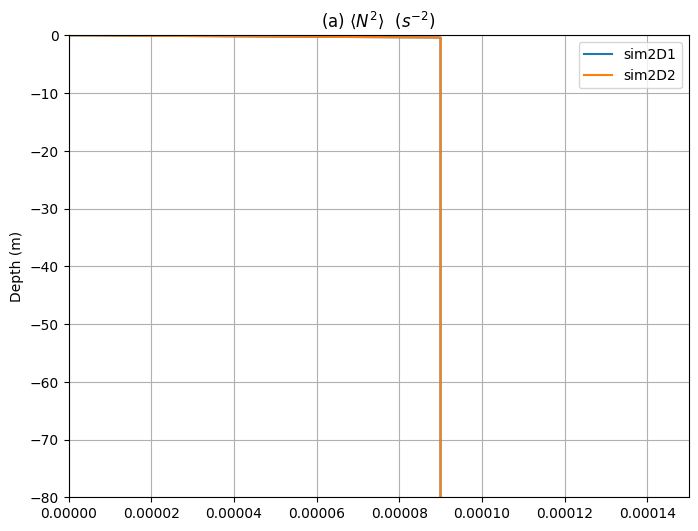

In [173]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Define a function to update the plot for each frame
def update(frame):
    ax.cla()  # Clear the current axis
    for i in range(0,num_simulations):
        ds_avg = ncs[i]
        ax.plot(ds_avg.N2.isel(time=frame), ds_avg.zF, label=f"{cases[i]}")
    
    # Convert time to days, hours, and minutes
    time_in_seconds = pd.to_timedelta(ds_avg.time[frame].values, unit='s')
    days = time_in_seconds.days
    hours, remainder = divmod(time_in_seconds.seconds, 3600)

    ax.set_ylabel('Depth (m)')
    ax.legend()
    ax.set_title(f"(a) $\\left\\langle N^2 \\right\\rangle ~~ (s^{{-2}})$ at time: {days}d {hours}h")
    ax.grid()
    ax.set_ylim(-80, 0)
    ax.set_xlim(0,15e-5)

# Create the animation object
ani = animation.FuncAnimation(fig, update, frames=len(ds_avg.time), interval=100, repeat=False)

# Save the animation as a GIF
ani.save(f'images/buoyancy-frequency-evaluation.gif', writer='pillow')

# Mean Buoyancy Budget

In [488]:
index = 0                  # 0 -> 2D1, 1 -> 2D2, ...
data_set1 = cases[index]
ds_avg1 = ncs[index]

print(f"Using data set: {data_set1}")

index = 1                  # 0 -> 2D1, 1 -> 2D2, ...
data_set2 = cases[index]
ds_avg2 = ncs[index]

print(f"Using data set: {data_set2}")

figure_name = "Figure 4"

Using data set: sim2D1-nosl
Using data set: sim2D2-nosl


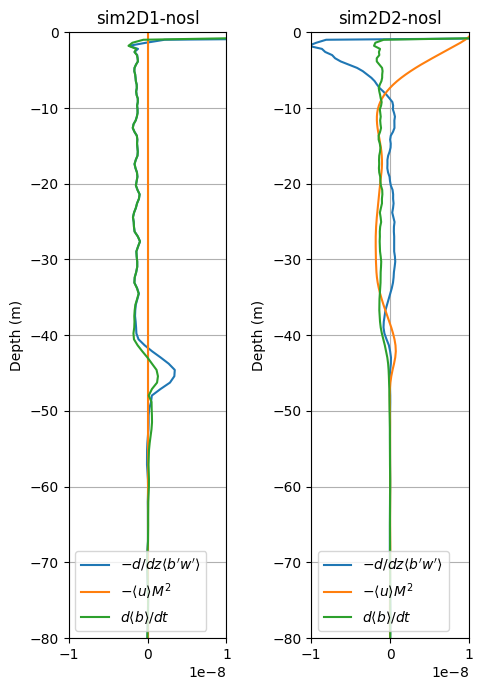

In [489]:
# Compute the mask for one inertial period centered at day 15
inertial_period_days = inertial_period / (24 * 3600)    # convert to days

center_day = 15
start_day = center_day - inertial_period_days / 2
end_day = center_day + inertial_period_days / 2
time_in_days = ds_avg['time'].values / np.timedelta64(1, 'D')

time_mask = (time_in_days >= start_day) & (time_in_days <= end_day)

ds_selected_wbdz1 = ds_avg1.wbdz.sel(time=time_mask)
ds_mean_wbdz1 = ds_selected_wbdz1.mean(dim='time')

ds_selected_uM21 = ds_avg1.uM2.sel(time=time_mask)
ds_mean_uM21 = ds_selected_uM21.mean(dim='time')

ds_selected_bdt1 = - ds_avg1.wbdz.sel(time=time_mask) - ds_avg1.uM2.sel(time=time_mask) + ds_avg1.κbdz2.sel(time=time_mask)
ds_mean_bdt1 = ds_selected_bdt1.mean(dim='time')

ds_selected_wbdz2 = ds_avg2.wbdz.sel(time=time_mask)
ds_mean_wbdz2 = ds_selected_wbdz2.mean(dim='time')

ds_selected_uM22 = ds_avg2.uM2.sel(time=time_mask)
ds_mean_uM22 = ds_selected_uM22.mean(dim='time')

ds_selected_bdt2 = - ds_avg2.wbdz.sel(time=time_mask) - ds_avg2.uM2.sel(time=time_mask) + ds_avg2.κbdz2.sel(time=time_mask)
ds_mean_bdt2 = ds_selected_bdt2.mean(dim='time')


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 7)) 
# plotting <u>
ax1 = axes[0]
ax1.plot(-ds_mean_wbdz1, ds_avg.zC, label="$-d/dz \\langle b'w' \\rangle$")
ax1.plot(-ds_mean_uM21, ds_avg.zC, label="$-\\langle u \\rangle M^2$")
ax1.plot(ds_mean_bdt1, ds_avg.zC, label="$d\\langle b \\rangle / dt$")
ax1.set_ylabel('Depth (m)')
ax1.set_ylim(-80, 0)
ax1.legend()
ax1.set_title(f"{data_set1}")
ax1.set_xlim(-1e-8,1e-8)
ax1.grid()

# plotting <v>
ax2 = axes[1]
ax2.plot(-ds_mean_wbdz2, ds_avg.zC, label="$-d/dz \\langle b'w' \\rangle$")
ax2.plot(-ds_mean_uM22, ds_avg.zC, label="$-\\langle u \\rangle M^2$")
ax2.plot(ds_mean_bdt2, ds_avg.zC, label="$d\\langle b \\rangle / dt$")
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(-80, 0)
ax2.legend()
ax2.set_xlim(-1e-8,1e-8)
ax2.set_title(f"{data_set2}")
ax2.grid()


plt.tight_layout()
plt.savefig(f"images/{image_save_folder}{figure_name}.png", dpi=300, bbox_inches='tight')
plt.show()

# Mean Velocities and Turbulent Ekman Balance

$$\begin{align*} f\langle u \rangle &\backsimeq - \frac{\partial \langle v^\prime w^\prime \rangle}{\partial z} + \nu \frac{\partial^2 \langle v \rangle}{\partial z^2} \\ -f\langle v \rangle &\backsimeq - \frac{\partial \langle u^\prime w^\prime \rangle}{\partial z} + \nu \frac{\partial^2 \langle u \rangle}{\partial z^2} \end{align*}$$

## Figure 5

Simulation 2D2: (a) Mean cross-front velocity, (b) mean alongfront velocity, and (c) hodograph of the mean velocity vectors (all m s−1). All quantities are averaged in x and for 1 inertial period centered at t = 15 days.

In [490]:
index = 1                  # 0 -> 2D1, 1 -> 2D2, ...
data_set = cases[index]
ds_avg = ncs[index]

print(f"Using data set: {data_set}")

figure_name = "Figure 5"

Using data set: sim2D2-nosl


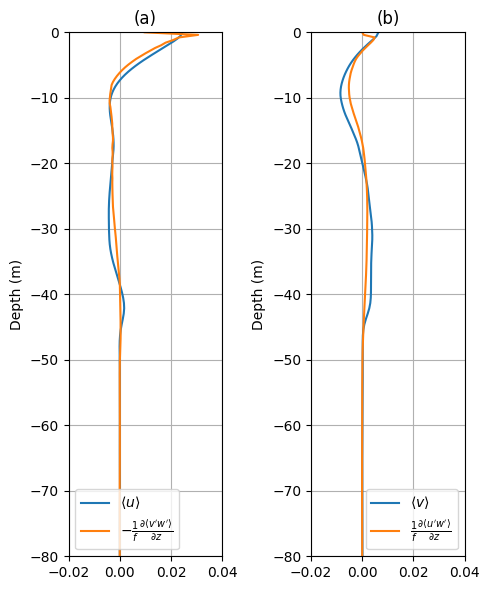

In [491]:
# Compute the mask for one inertial period centered at day 15
inertial_period_days = inertial_period / (24 * 3600)    # convert to days

center_day = 15
start_day = center_day - inertial_period_days / 2
end_day = center_day + inertial_period_days / 2
time_in_days = ds_avg['time'].values / np.timedelta64(1, 'D')

time_mask = (time_in_days >= start_day) & (time_in_days <= end_day)

ds_selected_u = ds_avg.u.sel(time=time_mask)
ds_mean_u = ds_selected_u.mean(dim='time')

ds_selected_fivw = ds_avg['fivw′dz'].sel(time=time_mask)
ds_mean_fivw = ds_avg['fivw′dz'].mean(dim='time')


ds_selected_v = ds_avg.v.sel(time=time_mask)
ds_mean_v = ds_selected_v.mean(dim='time')

ds_selected_fiuw = ds_avg['fiuw′dz'].sel(time=time_mask)
ds_mean_fiuw = ds_avg['fiuw′dz'].mean(dim='time')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 6), sharex=True) 
# plotting <u>
ax1 = axes[0]
ax1.plot(ds_mean_u, ds_avg.zC, label="$\\langle u \\rangle$")
ax1.plot(-ds_mean_fivw, ds_mean_fivw.zF, label="$-\\frac{1}{f}\\frac{\\partial \\langle v' w' \\rangle}{\\partial z}$")
ax1.set_ylabel('Depth (m)')
ax1.set_ylim(-80, 0)
ax1.set_xlim(-0.02, 0.04)
ax1.legend()
ax1.set_title("(a)")
ax1.grid()

# plotting <v>
ax2 = axes[1]
ax2.plot(ds_mean_v, ds_avg.zC, label="$\\langle v \\rangle$")
ax2.plot(ds_mean_fiuw, ds_mean_fiuw.zF, label="$\\frac{1}{f}\\frac{\\partial \\langle u' w' \\rangle}{\\partial z}$")
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(-80, 0)
ax1.set_xlim(-0.02, 0.04)
ax2.legend()
ax2.set_title("(b)")
ax2.grid()


plt.tight_layout()
plt.savefig(f"images/{image_save_folder}{figure_name}-ab.png", dpi=300, bbox_inches='tight')
plt.show()

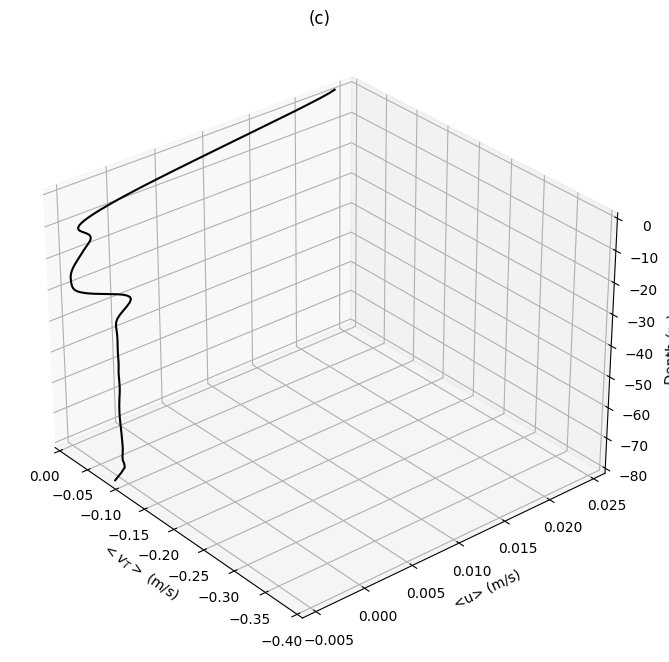

In [492]:
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

ds_selected_vt = ds_avg.vt.sel(time=time_mask)
ds_mean_vt = ds_selected_vt.mean(dim='time')

ax.plot(ds_mean_v,ds_mean_u, ds_avg.zC, color='black')

ax.set_ylabel('<u> (m/s)')
ax.set_xlabel(r'$<v_{T}>$ (m/s)')
ax.set_zlabel('Depth (m)')
ax.set_zlim(-80, 0)
ax.set_xlim(0,-0.4)
ax.set_title("(c)")
ax.view_init(elev=30, azim=-40)

plt.savefig(f"images/{image_save_folder}{figure_name}-c.png", dpi=300, bbox_inches='tight')
plt.show()

## Mean Velocities Evolution Movie

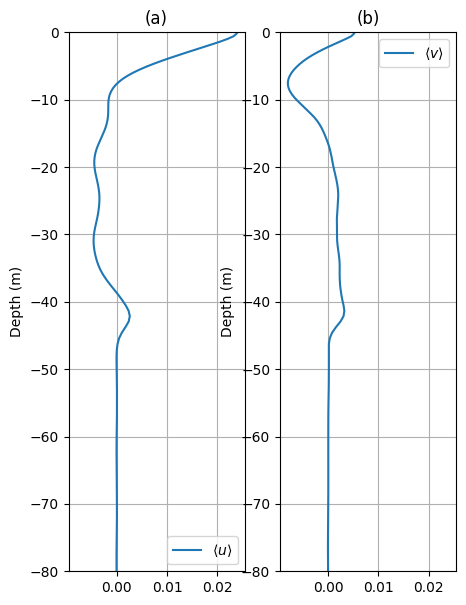

In [149]:
# Create a figure and axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 7), sharex=True) 

# Define a function to update the plot for each frame
def update(frame):
    # plotting <u>
    ax1 = axes[0]
    ax1.cla()  # Clear the current axis
    ax1.plot(ds_mean_u, ds_avg.zC, label="$\langle u \\rangle$")
    ax1.set_ylabel('Depth (m)')
    ax1.set_ylim(-80, 0)
    ax1.legend()
    ax1.set_title("(a)")
    ax1.grid()

    # plotting <v>
    ax2 = axes[1]
    ax2.cla()  # Clear the current axis    
    ax2.plot(ds_mean_v, ds_avg.zC, label="$\langle v \\rangle$")
    ax2.set_ylabel('Depth (m)')
    ax2.set_ylim(-80, 0)
    ax2.legend()
    ax2.set_title("(b)")
    ax2.grid()
    
    # Convert time to days, hours, and minutes
    time_in_seconds = pd.to_timedelta(ds_avg.time[frame].values, unit='s')
    days = time_in_seconds.days
    hours, remainder = divmod(time_in_seconds.seconds, 3600)

    # fig.title(f"t = {days}d {hours}h")

# Create the animation object
ani = animation.FuncAnimation(fig, update, frames=len(ds_avg.time), interval=100, repeat=False)

# Save the animation as a GIF
ani.save(f'images/mean-velocity-evaluation.gif', writer='pillow')

# Mean PV

$$\langle q \rangle = f \frac{\partial \langle b \rangle}{\partial z} + \frac{\partial}{\partial z}\langle \zeta^\prime b^\prime \rangle - M^2 \frac{\partial \langle v_T \rangle}{\partial z}

## Profiles

mean PV at $t=10$ days, $x$-averaged and averaged over one inertial period

In [493]:
index = 0                  # 0 -> 2D1, 1 -> 2D2, ...
data_set_1 = cases[index]
ds_avg_1 = ncs[index]

print(f"Using data set: {data_set_1}")

index = 1                  # 0 -> 2D1, 1 -> 2D2, ...
data_set_2 = cases[index]
ds_avg_2 = ncs[index]

print(f"Using data set: {data_set_2}")

figure_name = "Figure 13"

Using data set: sim2D1-nosl
Using data set: sim2D2-nosl


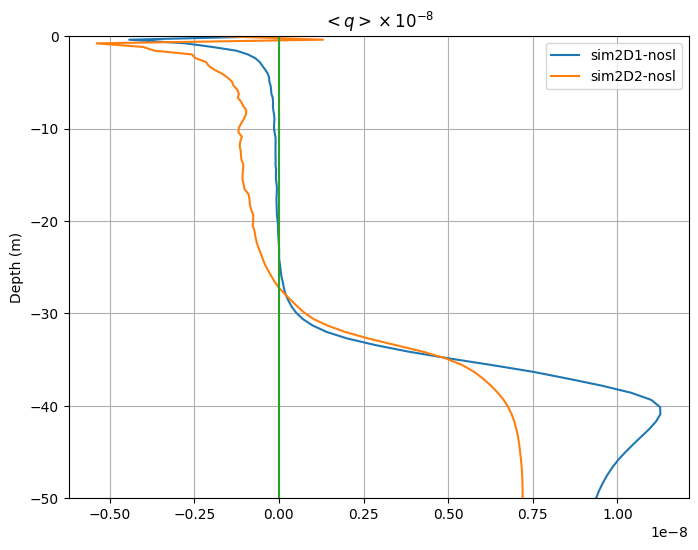

In [494]:
ds_q_avg_1 = ds_avg_1.fbdz + ds_avg_1["ζb′"] - ds_avg_1.M2mvtdz 
ds_q_avg_2 = ds_avg_2.fbdz + ds_avg_2["ζb′"] - ds_avg_2.M2mvtdz 

time_1 = ds_q_avg_1.coords['time'].values / np.timedelta64(1, 'D')  # Convert time to days
time_2 = ds_q_avg_2.coords['time'].values / np.timedelta64(1, 'D')  # Convert time to days

center_day = 10
start_day = center_day - inertial_period_days / 2
end_day = center_day + inertial_period_days / 2
time_in_days_1 = ds_avg_1['time'].values / np.timedelta64(1, 'D')
time_in_days_2 = ds_avg_2['time'].values / np.timedelta64(1, 'D')

time_mask_1 = (time_in_days_1 >= start_day) & (time_in_days_1 <= end_day)
time_mask_2 = (time_in_days_2 >= start_day) & (time_in_days_2 <= end_day)

ds_selected_q_1 = ds_q_avg_1.sel(time=time_mask_1)
ds_selected_q_2 = ds_q_avg_2.sel(time=time_mask_2)
ds_mean_q_1 = ds_selected_q_1.mean(dim='time')
ds_mean_q_2 = ds_selected_q_2.mean(dim='time')

plt.figure(figsize=(8, 6))
plt.plot(ds_mean_q_1, ds_avg_1.zF, label=f"{data_set_1}")
plt.plot(ds_mean_q_2, ds_avg_2.zF, label=f"{data_set_2}")
plt.plot(np.zeros(len(ds_avg_2.zF)), ds_avg_2.zF)
plt.title(f"$<q> \\times 10^{{-8}}$")
plt.ylim(-50,0)
plt.ylabel('Depth (m)')
plt.legend()
plt.grid()
plt.savefig(f"images/{image_save_folder}{figure_name}.png", dpi=300, bbox_inches='tight')
plt.show()

## Contour Plots

Integrating Equation (23) yields $$H(t) = \left[ H_0^2 + \frac{2ft}{fN_0^2 - M^4/f}(1 + \alpha + \beta)(B_0 - \frac{\tau_y^w M^2}{\rho_0 f})\right]^{{1/2}}.$$ Since we are considering the case where $\tau_y^w=0$ we can simplify this to $$H(t) = \left[ H_0^2 + \frac{2ftB_0}{fN_0^2 - M^4/f}(1 + \alpha + \beta)\right]^{{1/2}}$$ where $H_0$ is the low PV layer depth at $t=0$: Would this just be zero and thus  $$H_0^2 = \left[ \frac{2f \cdot 0 \cdot B_0}{fN_0^2 - M^4/f}(1 + \alpha + \beta)\right]^{{1/2}} = 0.$$ Therefore, we can predict the low PV layer depth using $$H(t) = \left[\frac{2ftB_0}{fN_0^2 - M^4/f}(1 + \alpha + \beta)\right]^{{1/2}}$$ I think having $H_0 = 0$ may be incorrect since the square root is having negative values. For now, let's just use `abs()` around the inner function being square rooted $$H(t) = \left| \frac{2ftB_0}{fN_0^2 - M^4/f}(1 + \alpha + \beta)\right|^{{1/2}}$$

In [495]:
num_simulations = [0,1,2,3,4,5]
# num_simulations = [0]

figure_name = "Figure 7-9"

In [499]:
#TODO: FIX ME 
def predicted_PV_depth(t,i):
    ds_avg = ncs[i]
    f = ds_avg.attrs.get("f")
    N02 = ds_avg.attrs.get("N₀²")
    M2 = ds_avg.attrs.get("M²")
    B0 = ds_avg.attrs.get("B₀")
    H0 = 0
    #alpha = ncs[i].attrs.get("\alpha\_s") + ncs[i].attrs.get("\alpha\_s")
    #beta = ncs[i].attrs.get("\beta")
    alpha = alpha_beta_list[i][0]
    beta = alpha_beta_list[i][1]
    inner1 = 2*f*t*B0 / (f * N02**2 - (M2 ** 2 / f))
    inner2 = (1 + alpha + beta)
    return (H0 + abs(inner1 * inner2))**(1/2)

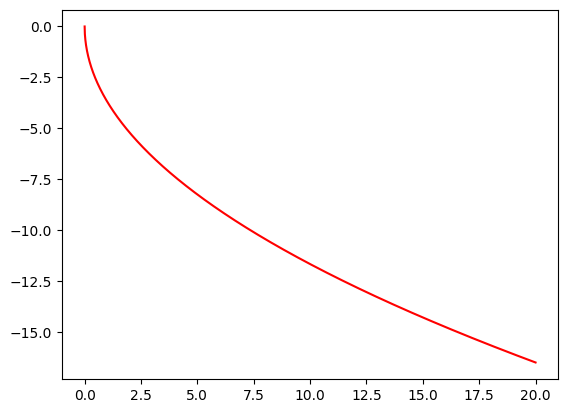

In [504]:
ds_avg = ncs[4]
ds_q_avg = ds_avg.fbdz + ds_avg["ζb′"] - ds_avg.M2mvtdz 
time_values = ds_q_avg.coords["time"].values / np.timedelta64(1, 'D')  # Convert time to days
predicted_depth = predicted_PV_depth(time_values, 0)
plt.plot(time_values, -1 * predicted_depth, color='red', label='Predicted PV Depth')

sim2D1-nosl


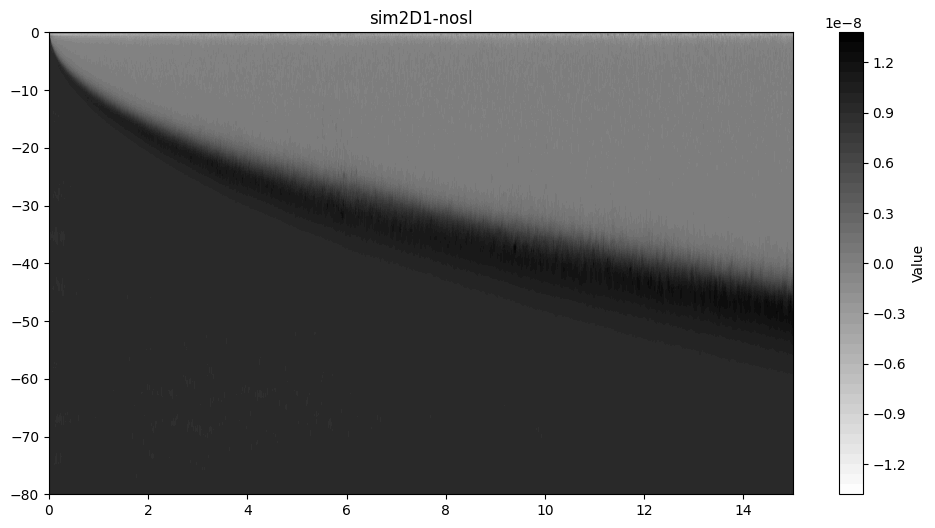

sim2D2-nosl


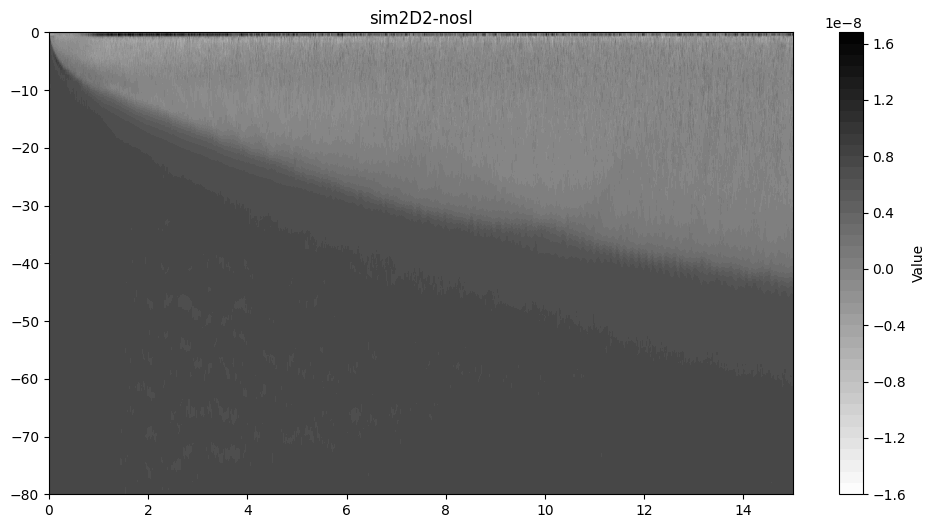

sim2D3-nosl


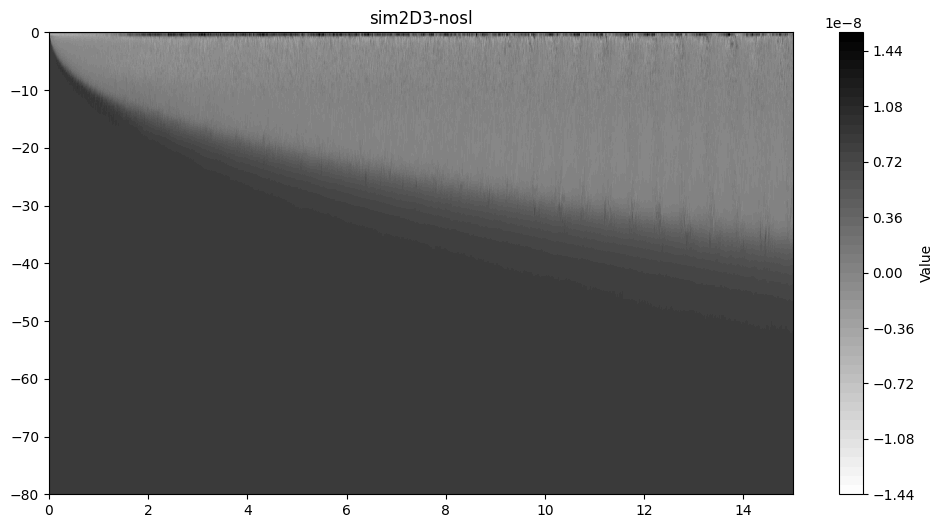

sim2D4-nosl


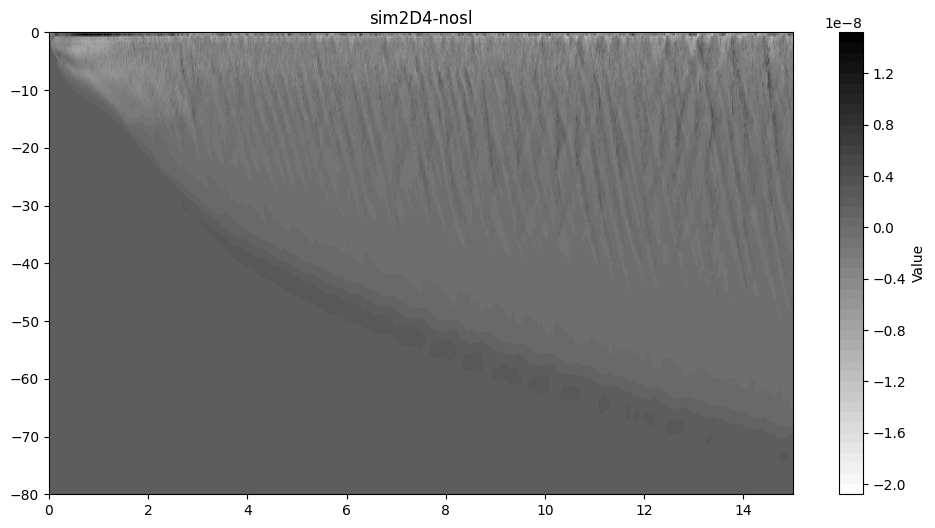

sim2D5-nosl


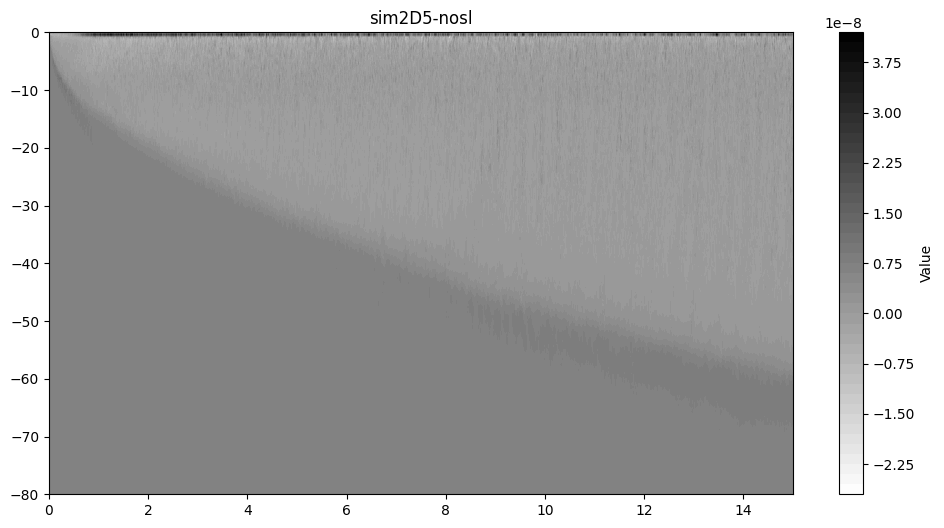

sim2D6-nosl


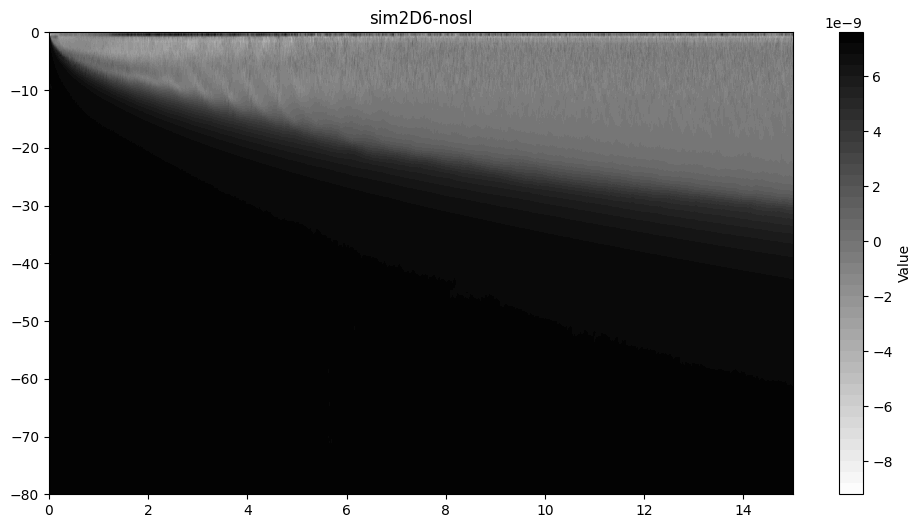

In [497]:

for i in num_simulations:
    ds_avg = ncs[i]
    data_set = cases[i]
    print(data_set)
    ds_q_avg = ds_avg.fbdz + ds_avg["ζb′"] - ds_avg.M2mvtdz 
    
    plt.figure(figsize=(12, 6))
    contourf = plt.contourf(ds_q_avg.coords["time"].values / np.timedelta64(1, 'D') , ds_q_avg.coords["zF"].values, ds_q_avg.T, levels=50, cmap='gray_r')
    plt.colorbar(contourf, label='Value')
    
    # time_values = ds_q_avg.coords["time"].values / np.timedelta64(1, 'D')  # Convert time to days
    # predicted_depth = predicted_PV_depth(time_values, i)
    # plt.plot(time_values, -1 * predicted_depth, color='red', label='Predicted PV Depth')
    
    plt.ylim(-80,0)
    plt.xlim(0,15)
    plt.title(f"{data_set}")
    plt.savefig(f"images/{image_save_folder}{figure_name}-{cases[i]}.png", dpi=300, bbox_inches='tight')
    plt.show()

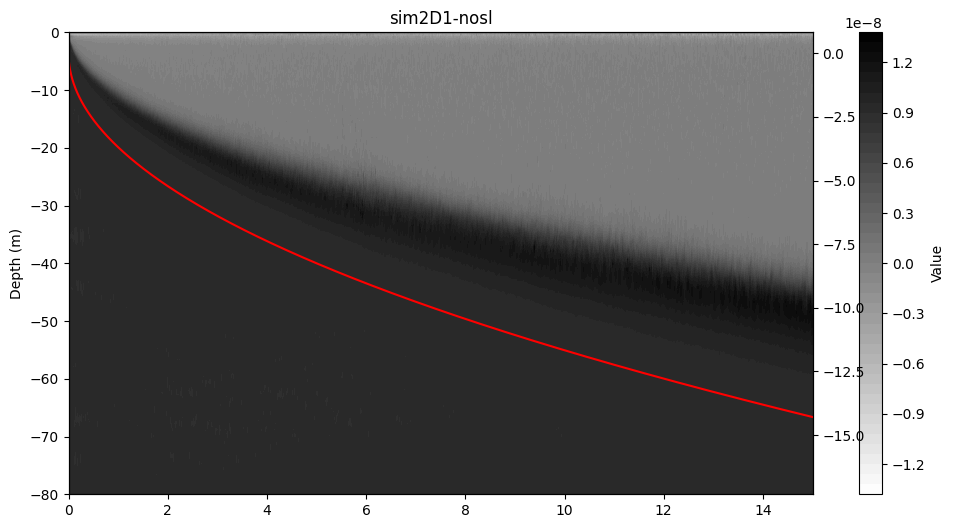

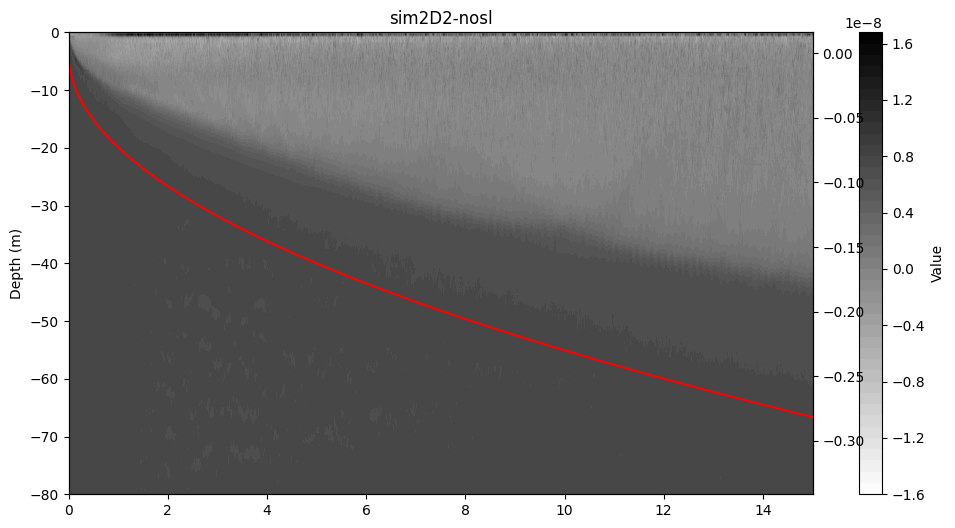

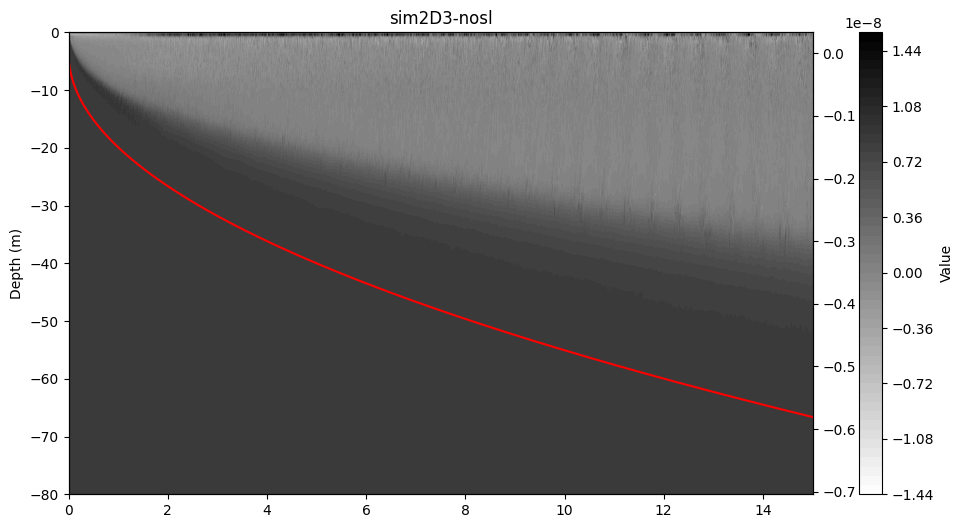

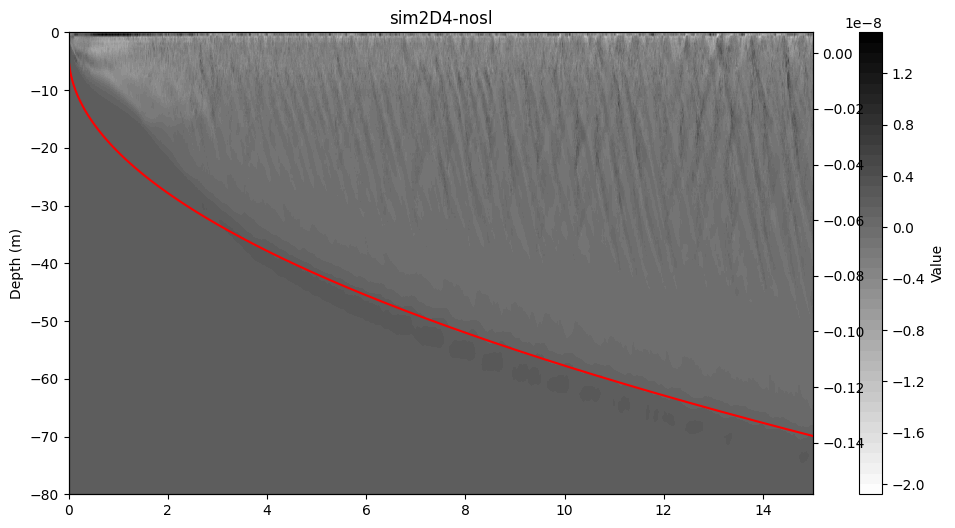

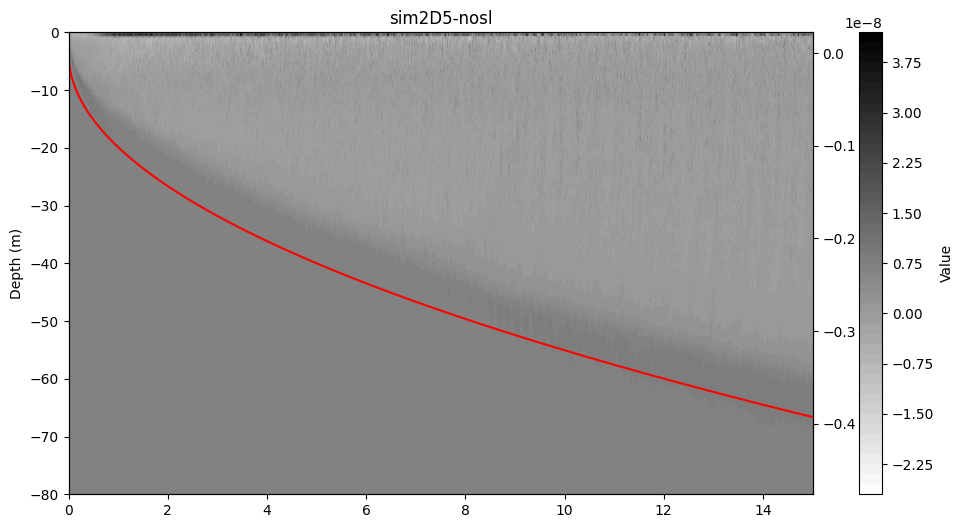

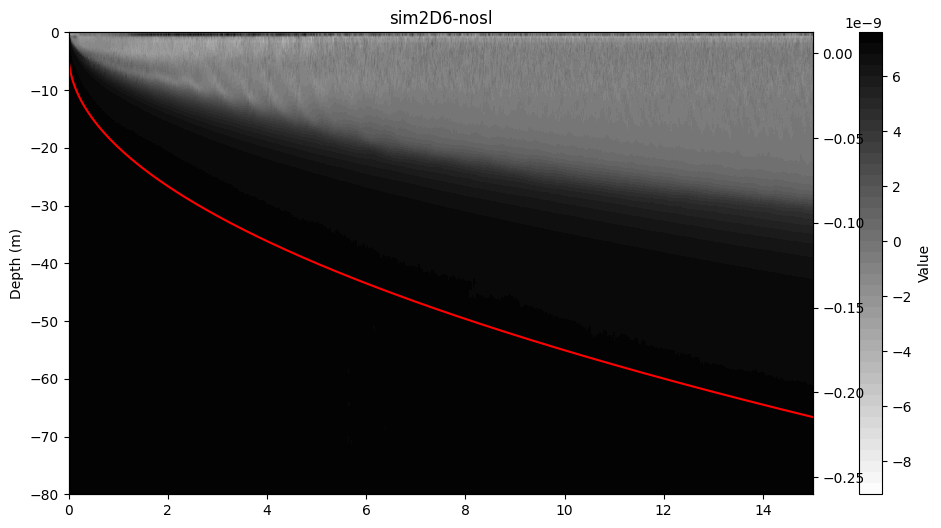

In [505]:
for i in num_simulations:
    ds_avg = ncs[i]
    data_set = cases[i]
    ds_q_avg = ds_avg.fbdz + ds_avg["ζb′"] - ds_avg.M2mvtdz 
    
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    contourf = ax1.contourf(ds_q_avg.coords["time"].values / np.timedelta64(1, 'D'), 
                            ds_q_avg.coords["zF"].values, 
                            ds_q_avg.T, 
                            levels=50, cmap='gray_r')
    ax1.set_ylabel('Depth (m)')
    ax1.set_ylim(-80, 0)
    ax1.set_xlim(0, 15)
    ax1.set_title(f"{data_set}")
    
    cbar = fig.colorbar(contourf, ax=ax1, label='Value')
    
    # Create a twin y-axis
    ax2 = ax1.twinx()
    
    time_values = ds_q_avg.coords["time"].values / np.timedelta64(1, 'D')  # Convert time to days
    predicted_depth = predicted_PV_depth(time_values, i)
    ax2.plot(time_values, -1 * predicted_depth, color='red', label='Predicted PV Depth')
    
    
    plt.show()

# Sponge Layer compared with no Sponge Layer

In [475]:
nc_file = f"../Data/sim2D2-20_averages.nc"
ds_avg1 = xr.open_dataset(nc_file).load()
ds_avg1.close()

nc_file = f"../Data/sim2D2-20-nosl_averages.nc"
ds_avg2 = xr.open_dataset(nc_file).load()
ds_avg2.close()

In [477]:
abs(ds_avg1.N2 - ds_avg2.N2).max().values

array(2.52251002e-05)